## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

## Leitura dos Dados

In [2]:
Games_dados = pd.read_csv("../dados/vgsales-12-4-2019.csv")

## Explorando os Dados

In [3]:
Games_dados.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


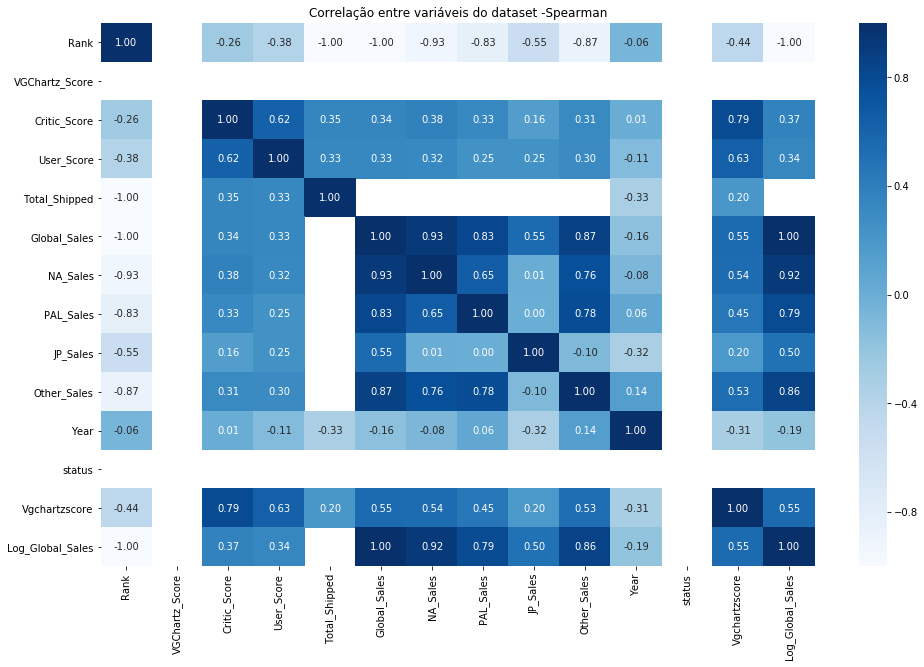

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.heatmap(Games_dados.corr(method='spearman'),annot = True,fmt = '.2f',cmap='Blues')
plt.title('Correlação entre variáveis do dataset -Spearman')
plt.show()

### Verificando a distribuição do total de vendas

In [4]:
Games_dados.Global_Sales.mean()

0.3655029616276456

In [5]:
Games_dados.Global_Sales.median()

0.12

In [6]:
Games_dados.Global_Sales.describe()

count    19415.000000
mean         0.365503
std          0.833022
min          0.000000
25%          0.030000
50%          0.120000
75%          0.360000
max         20.320000
Name: Global_Sales, dtype: float64

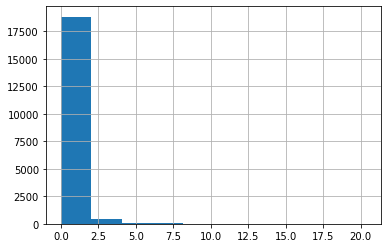

In [8]:
Games_dados['Global_Sales'].hist()

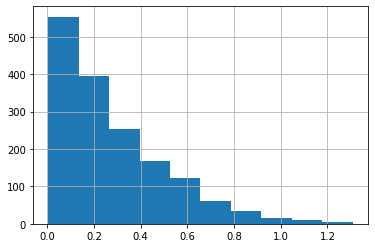

In [10]:
Games_dados['Log_Global_Sales'] = Games_dados['Global_Sales'].apply(np.log10)
Games_dados[Games_dados['Log_Global_Sales'] > 0]['Log_Global_Sales'].hist()

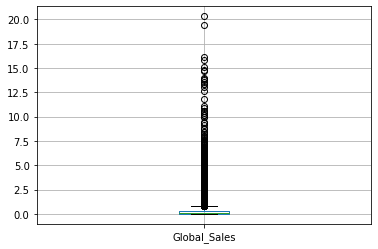

In [19]:
Games_dados.boxplot(column=['Global_Sales'])

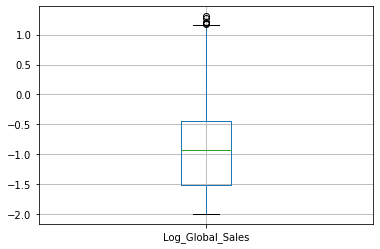

In [20]:
Games_dados.boxplot(column=['Log_Global_Sales'])

### Verificando o Gênero/Plataforma com maior presença no dataset

In [11]:
Games_dados.Genre.mode()

0    Misc
dtype: object

In [12]:
Games_dados.Genre.value_counts()

Misc                9476
Action              7667
Adventure           5293
Sports              5244
Shooter             4586
Role-Playing        4551
Platform            3445
Strategy            3266
Puzzle              3162
Racing              3030
Simulation          2737
Fighting            2085
Action-Adventure     609
Visual Novel         260
Music                195
Party                 75
MMO                   74
Board Game            16
Education             12
Sandbox                9
Name: Genre, dtype: int64

In [14]:
Games_dados.Platform.mode()

0    PC
dtype: object

In [15]:
Games_dados.Platform.value_counts()

PC       10978
PS2       3564
DS        3292
PS        2703
XBL       2115
PSN       2004
PS3       1870
PSP       1804
PS4       1755
X360      1701
Wii       1674
GBA       1658
GB        1601
SNES      1209
3DS       1192
NS        1186
NES       1105
XOne      1082
PSV       1046
And       1007
XB         984
GEN        805
DSiW       753
SAT        739
GC         666
OSX        658
DC         655
VC         653
2600       501
WW         467
         ...  
AJ          72
PCFX        67
WinP        66
BRW         63
NGage       61
7800        59
iOS         57
GIZ         55
Arc         39
C64         31
Amig        29
MSD         27
Ouya        25
Mob         22
VB          22
ACPC        20
ZXS         19
AST         17
iQue        17
GBC         17
MSX          7
CDi          6
ApII         4
S32X         3
CD32         3
TG16         3
FMT          3
Aco          1
C128         1
BBCM         1
Name: Platform, Length: 74, dtype: int64

### Tipos de Dados

In [21]:
Games_dados.dtypes

Rank                int64
Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
PAL_Sales         float64
JP_Sales          float64
Other_Sales       float64
Year              float64
Last_Update        object
url                object
status              int64
Vgchartzscore     float64
img_url            object
dtype: object

#### Tipos
    * Tipos Categoricos (Binario, Nominal , Ordinal):
        Name , basename , Genre , Platform, Publisher , Developer ,Last_Update, ESRB_Rating ,url , img_url

In [37]:
#ajustando tipos dos dados
Games_dados['Name'] = Games_dados['Name'].astype('category')
Games_dados['basename'] = Games_dados['basename'].astype('category')
Games_dados['Genre'] = Games_dados['Genre'].astype('category')
Games_dados['Platform'] = Games_dados['Platform'].astype('category')
Games_dados['Publisher'] = Games_dados['Publisher'].astype('category')
Games_dados['Developer'] = Games_dados['Developer'].astype('category')
Games_dados['Last_Update'] = Games_dados['Last_Update'].astype('category')
Games_dados['ESRB_Rating'] = Games_dados['ESRB_Rating'].astype('category')
Games_dados['img_url'] = Games_dados['img_url'].astype('category')
Games_dados['url'] = Games_dados['url'].astype('category')

In [38]:
Games_dados.dtypes

Rank                 int64
Name              category
basename          category
Genre             category
ESRB_Rating       category
Platform          category
Publisher         category
Developer         category
VGChartz_Score     float64
Critic_Score       float64
User_Score         float64
Total_Shipped      float64
Global_Sales       float64
NA_Sales           float64
PAL_Sales          float64
JP_Sales           float64
Other_Sales        float64
Year               float64
Last_Update       category
url               category
status               int64
Vgchartzscore      float64
img_url           category
dtype: object

In [39]:
Games_dados['Genre'].cat.categories

Index(['Action', 'Action-Adventure', 'Adventure', 'Board Game', 'Education',
       'Fighting', 'MMO', 'Misc', 'Music', 'Party', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Sandbox', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'Visual Novel'],
      dtype='object')

In [40]:
Games_dados['Platform'].cat.categories

Index(['2600', '3DO', '3DS', '5200', '7800', 'ACPC', 'AJ', 'AST', 'Aco',
       'Amig', 'And', 'ApII', 'Arc', 'BBCM', 'BRW', 'C128', 'C64', 'CD32',
       'CDi', 'DC', 'DS', 'DSi', 'DSiW', 'FMT', 'GB', 'GBA', 'GBC', 'GC',
       'GEN', 'GG', 'GIZ', 'Int', 'Linux', 'Lynx', 'MS', 'MSD', 'MSX', 'Mob',
       'N64', 'NES', 'NG', 'NGage', 'NS', 'OSX', 'Ouya', 'PC', 'PCE', 'PCFX',
       'PS', 'PS2', 'PS3', 'PS4', 'PSN', 'PSP', 'PSV', 'S32X', 'SAT', 'SCD',
       'SNES', 'TG16', 'VB', 'VC', 'WS', 'WW', 'Wii', 'WiiU', 'WinP', 'X360',
       'XB', 'XBL', 'XOne', 'ZXS', 'iOS', 'iQue'],
      dtype='object')

### Remoção de Dados

In [44]:
Games_dados.shape

(55792, 23)

In [48]:
print(Games_dados.isnull().sum())

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64


In [52]:
len(Games_dados)

55792